In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("Student Mental health.csv")
df.columns = df.columns.str.strip()

In [27]:
df['What is your CGPA?'] = df['What is your CGPA?'].astype(str).str.strip().replace({
    '0 - 1.99': 1.5,
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75,
    'nan': None 
}).astype(float)

In [28]:
df_clean = df.dropna(subset=['What is your CGPA?', 'Age'])

In [29]:
X = df_clean[['What is your CGPA?']]
y = df_clean['Age']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
print("Intercept:", round(model.intercept_, 3))
print("Coefficient:", round(model.coef_[0], 3))
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 3))
print("R-squared:", round(r2_score(y_test, y_pred), 3))

Intercept: 20.7
Coefficient: -0.033
Mean Squared Error: 6.296
R-squared: -0.014


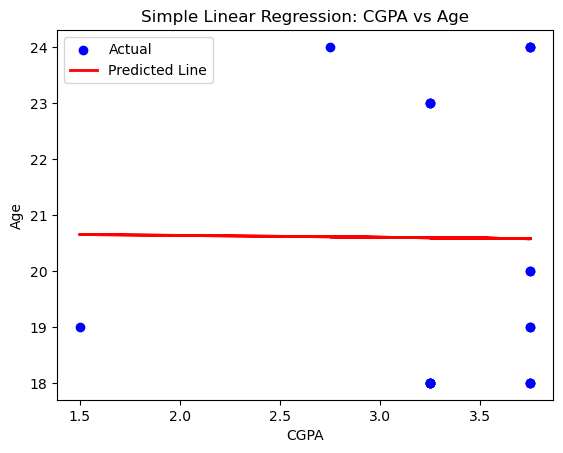

In [34]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title("Simple Linear Regression: CGPA vs Age")
plt.xlabel("CGPA")
plt.ylabel("Age")
plt.legend()
plt.show()